## Importamos y definimos el directorio y la version 

In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

#directorio='G:\\Redes\\'
version=1

## Armamos la red dirigida a partir del archivo filtrado

In [3]:
N=100000
i=0
G=nx.DiGraph()
archivo = open('archivo_red_'+str(version)+'.txt','r',encoding='utf-8')
for line in archivo:
    i+=1
    G.add_edges_from([(line.split()[0],line.split()[1])])
    if i==N:
        break
archivo.close()
len(G)

1461

## Graficamos la distribución de grado

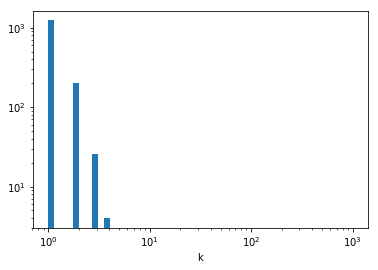

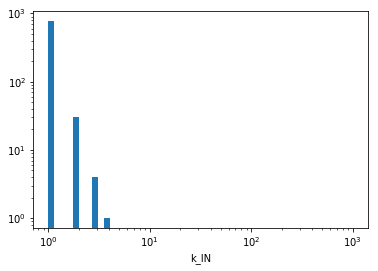

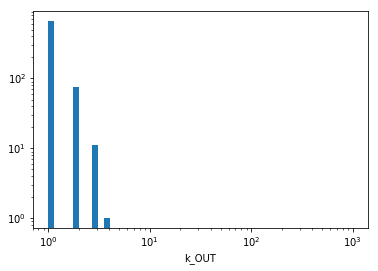

In [4]:
plt.figure()
grados_G = []
grados_G = [gra for n,gra in G.degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.figure()
# Distribución de grado IN
grados_G = []
grados_G = [gra for n,gra in G.in_degree()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.figure()
# Distribución de grado OUT
grados_G = []
grados_G = [gra for n,gra in G.out_degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

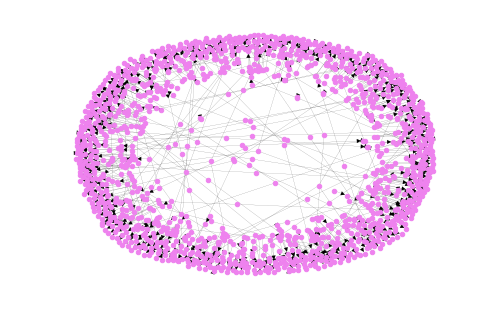

In [8]:
#GRAFICA LA RED ¡¡¡¡NO CORRER SI EN GRANDE!!!!

options = {
'node_size': 20,
'width': 0.1,
}
nx.draw(G,node_color = 'violet', **options)
plt.show()

## Añadimos el año del paper como atributo a cada nodo

In [6]:
archivo = open('archivo_year_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    try:
        G.node[line.split()[0]]['year']=int(line.split()[1])
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

## Armamos una lista de redes de cada año

In [11]:
def red_year(G):
    G_year={}
    for i in range(1850,2019):
        lista_nodos=[]
        for node in G.nodes:
            try:
                KEY=G.nodes[node]['year']<i+1
                if KEY:
                    lista_nodos.append(node)
            except KeyError:
                pass
        G_year[str(i)]=G.subgraph(lista_nodos)
    return(G_year)

In [12]:
G_year=red_year(G)

## Calculamos el tamaño de la red total y la componenete gigante año a año

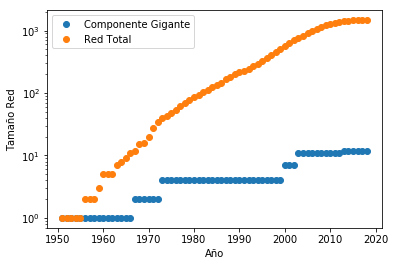

In [13]:
tamanos_gigante=[]
tamanos_red=[]
years=[]
campos=[]
for i in G_year.keys():
    campo=[]
    if len(G_year[i])>0:
        GG=G_year[i].to_undirected()
        Componente=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente=GG.subgraph(Componente)
        for node in Componente.nodes:
            try:
                campo.append(G.nodes[node]['campo'])
            except KeyError:
                pass
        campos.append(Counter(campo))
        tamanos_gigante.append(len(Componente))
        tamanos_red.append(len(GG))
        years.append(int(i))

plt.semilogy(years,tamanos_gigante,'o',label='Componente Gigante')
plt.semilogy(years,tamanos_red,'o',label='Red Total')

plt.xlabel('Año');plt.ylabel('Tamaño Red');plt.legend()
plt.show()

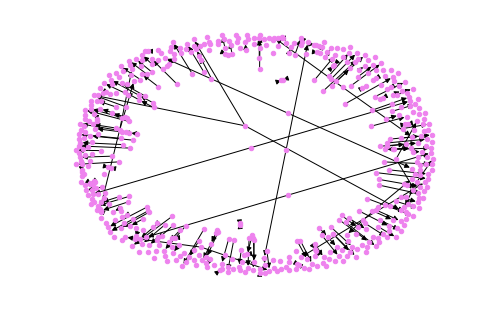

In [29]:
options = {
'node_size': 20,
'width': 1,}

nx.draw_spring(G_year['2000'],node_color = 'violet', **options)
plt.show()

In [35]:
pos = nx.layout.fruchterman_reingold_layout(G)


In [ ]:
pos2 = nx.layout.kamada_kawai_layout(G)

In [46]:
pos3 = nx.layout.spring_layout(G)

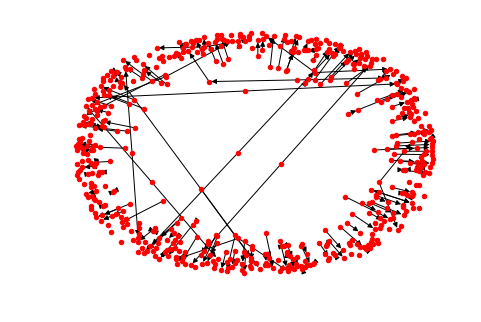

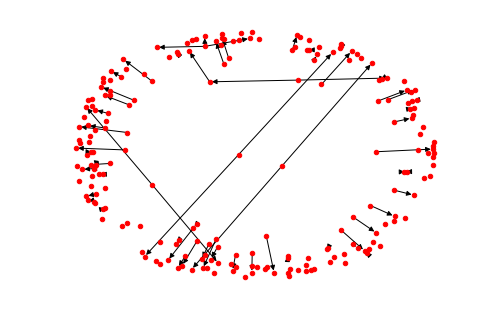

In [47]:
nx.draw(G_year['2000'],pos=pos3,**options)
plt.show()

nx.draw(G_year['1990'],pos=pos3,**options)
plt.show()

In [44]:
print(pos2)

{'d732b6bc-a3bc-4b14-a135-cbc3473a0cf4': array([0.99500752, 0.00959618]), 'd73d9eb8-b2b2-4979-bf55-722bba93bc2a': array([0.99500666, 0.00959736]), 'd732cc42-6bda-45ca-b43f-dd93725cd842': array([0.99504431, 0.01896978]), 'd79da3fb-1257-4dc5-b398-0c5d0d2574f4': array([0.99504336, 0.01897089]), 'd7332077-c431-4c11-8c47-d4d3a8aac899': array([0.71720826, 0.24268227]), 'd74e7e34-2481-4dc5-b954-c0ca786cb608': array([0.71720702, 0.2426815 ]), 'd78fdec0-4a5c-4743-a2be-6d1f613b33dc': array([0.71720856, 0.2426837 ]), 'd73325b6-abf7-4526-ab4f-b534197dc439': array([0.14601119, 0.41196623]), 'd7acf2d1-9053-4e32-96f2-1b5845767487': array([0.14601074, 0.41196762]), 'd7335748-4bdc-4f2d-b64c-e91dcb580090': array([0.58951598, 0.44265012]), 'd7de408d-d848-4eca-a264-19c384d615a2': array([0.58951743, 0.4426503 ]), 'd7f6304b-d11a-4478-9860-9369f197c643': array([0.58951655, 0.44265146]), 'd733dcbd-2a41-467f-ab0a-03f2213ea6e7': array([0.34392044, 0.13565548]), 'd8a7c8c8-ecdd-432a-941e-56bc4f998425': array([0.3

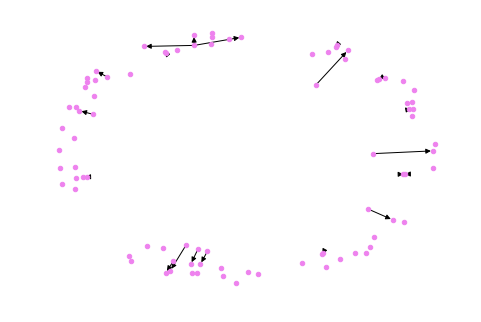

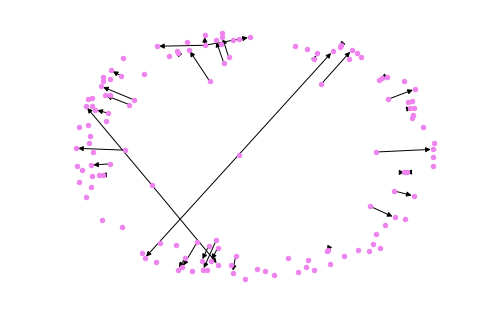

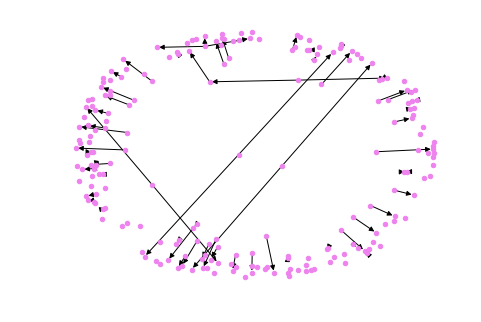

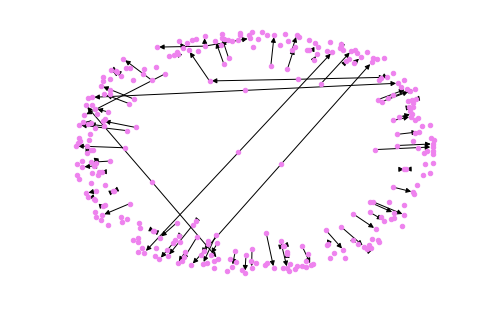

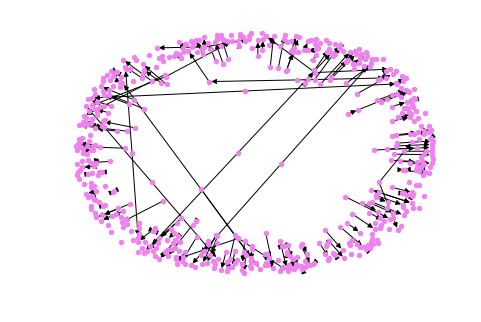

In [52]:
#GRAFICA LA RED ¡¡¡¡NO CORRER SI EN GRANDE!!!!

años=[1980,1985,1990,1995,2000]

options = {
'node_size': 20,
'width': 1,}

for i in años:
    nx.draw(G_year[str(i)],pos=pos3,node_color = 'violet', **options)
    plt.show()

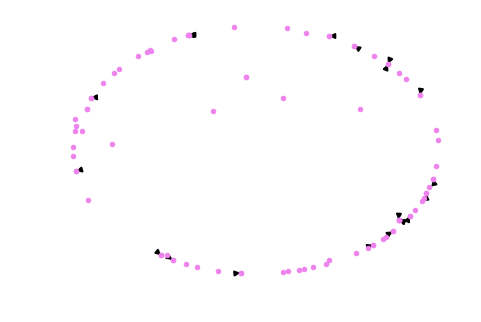

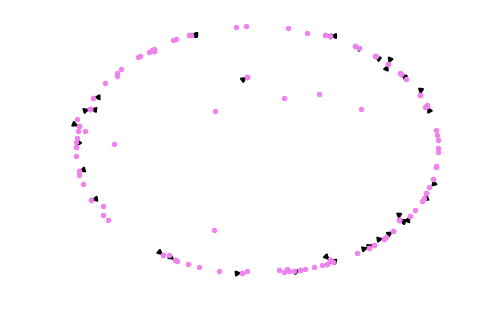

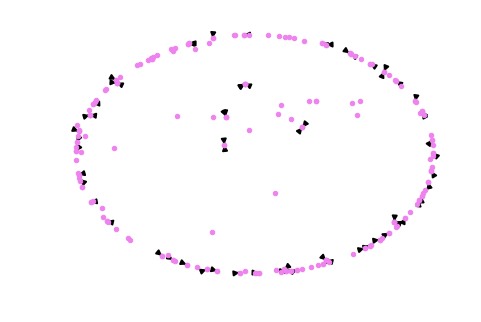

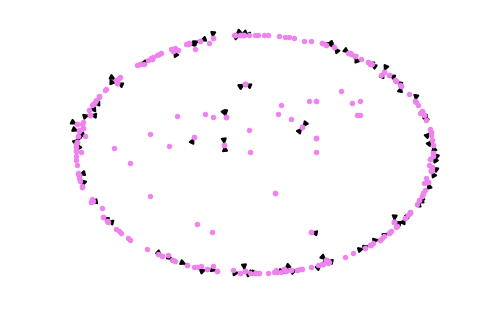

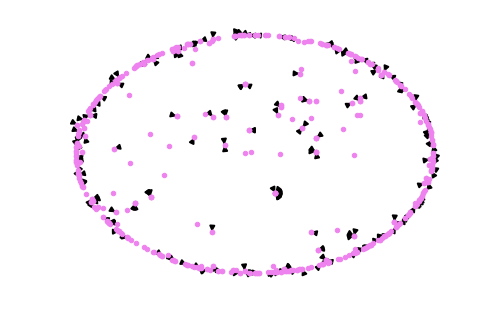

In [55]:
#GRAFICA LA RED ¡¡¡¡NO CORRER SI EN GRANDE!!!!

años=[1980,1985,1990,1995,2000]

options = {
'node_size': 20,
'width': 2,
'edge_size': 20}

for i in años:
    nx.draw(G_year[str(i)],pos=pos2,node_color = 'violet', **options)
    plt.show()